# Ebay-Kleinanzeigen - predict the price of used car

Нека първо да си заредим нужните библиотеки


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

След като вече си импортнахме нужните библиотеки ще се фокусираме върху dataframe-а. Темата е - Предвиждане на цена за кола втора употреба. Данните са взети от обявите в Ebay-Kleinanzeigen, Germany

In [2]:
original_df = pd.read_csv('autos.csv', encoding='latin-1')
original_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


видяхме грубо каква информация съдържа dataset-а. Сега нека видим малко статистики

In [3]:
original_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


След като разгледахме некатегориийните данни, забелязваме, че колоната nrOfPictures е излишна и съответно може да я махнем от dataset-a после

Ще разгледаме за за пропуснати стойности:

In [4]:
original_df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

Виждаме, че има голям брой пропуснати стойности (все пак и dataframe-a е голям :))
Ще се опитаме да ги запълним с оптимални стойности, но за целта първо нека визуализираме как различните стойности биха могли да афектират върху вземането на решение

Както виждаме най-голям брой на null стойности има при feature-а 'notRepairedDamage'. Нека видим какво е съотношението


In [5]:
original_df.notRepairedDamage.value_counts()

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [6]:
nein_repaired = original_df.notRepairedDamage.value_counts()['nein'] / original_df.notRepairedDamage.value_counts().sum()
ja_repaired = 1 - nein_repaired

print(nein_repaired)
print(ja_repaired)

mod_frame = original_df
mod_frame['notRepairedDamage'] = mod_frame['notRepairedDamage'].fillna(pd.Series(np.random.choice(['ja', 'nein'], 
                                                      p=[ja_repaired, nein_repaired], size=len(mod_frame))))

print(mod_frame['notRepairedDamage'].isna().sum())

0.87883179505
0.12116820495
0


Сега нека направим същото и за другите feature-и където забелязваме null стойности

За по-лесно ще си напишем функция, която да прави това вместо нас

In [7]:
def fill_na_proportion_categorial(dataframe, column_names) :
    for col in column_names:
        prop_array = list(map(lambda kat: dataframe[col].value_counts()[kat] / dataframe[col].value_counts().sum(), dataframe[col].value_counts().index))
        dataframe[col] = dataframe[col].fillna(pd.Series(np.random.choice(dataframe[col].value_counts().index, 
                                                      p=prop_array, size=len(dataframe))))
    return dataframe



In [8]:
null_indexex = ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']
mod_frame = fill_na_proportion_categorial(mod_frame, null_indexex)
original_df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

ОК. Запълнихме липсващите данни, сега нека да видим дали марката на колата се отразява на на това кога тя е регистрирана:

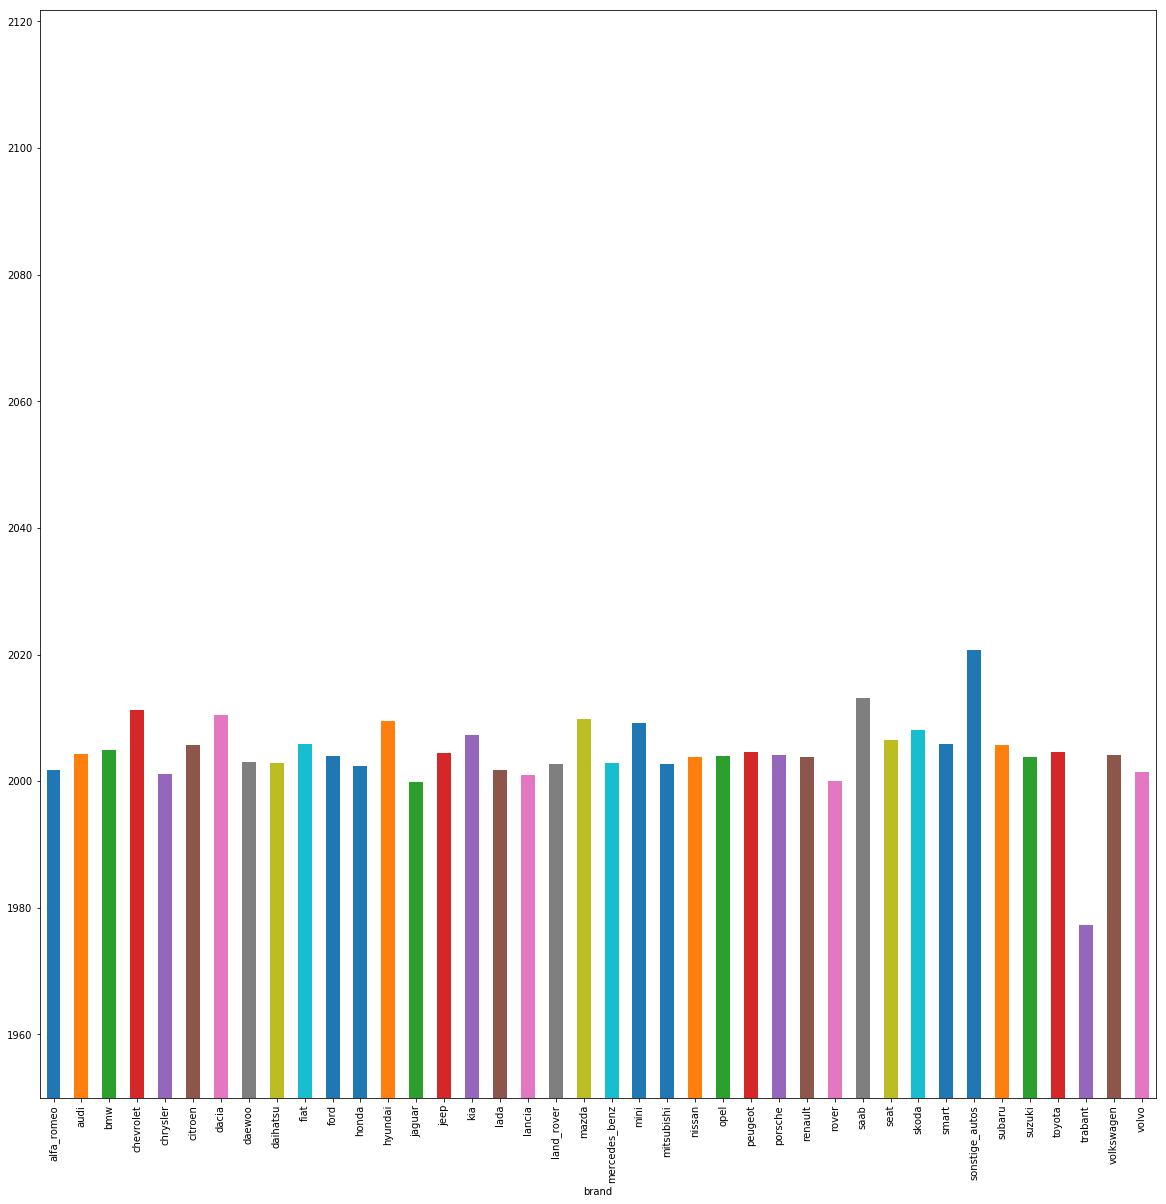

In [9]:
original_df.groupby('brand').yearOfRegistration.mean().plot(kind = 'bar', ylim = 1950, figsize = (20,20))

Забелязваме, че има коли като trabant които са доста стари и може би това било оскъпило пазарната им цена

In [10]:
mod_frame[mod_frame['brand'] == 'trabant'].price.mean()

20415.935702199662

да, доста е голяма

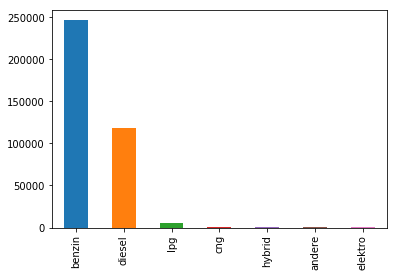

In [11]:
mod_frame['fuelType'].value_counts().plot(kind='bar')

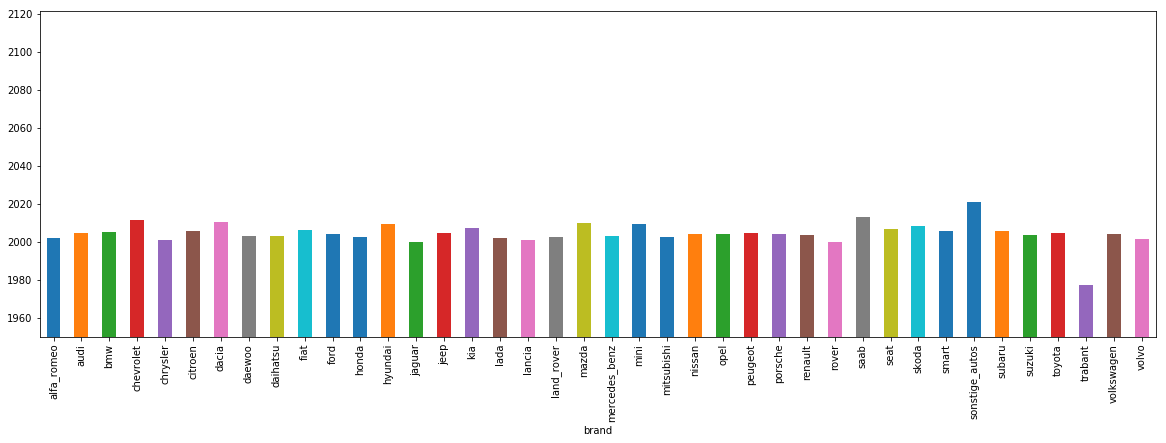

In [12]:
mod_frame.groupby('brand').yearOfRegistration.mean().plot(kind = 'bar', ylim = 1950, figsize = (20,6))

Уау, уау, какво забелязваме тук!!!..Някои коли имат година ан регистрация в бъдещето

Ще оправим този порблем. Нека първо обаче да поопростим dataframe-а

In [13]:
mod_frame['car_age']= (2016- mod_frame['yearOfRegistration'])


In [14]:
mod_frame = mod_frame.drop(['abtest', 'offerType', 'dateCreated', 'lastSeen', 'dateCrawled', 'nrOfPictures', 'yearOfRegistration', 'model'], axis=1)

Нека видим горната графика нормализирана

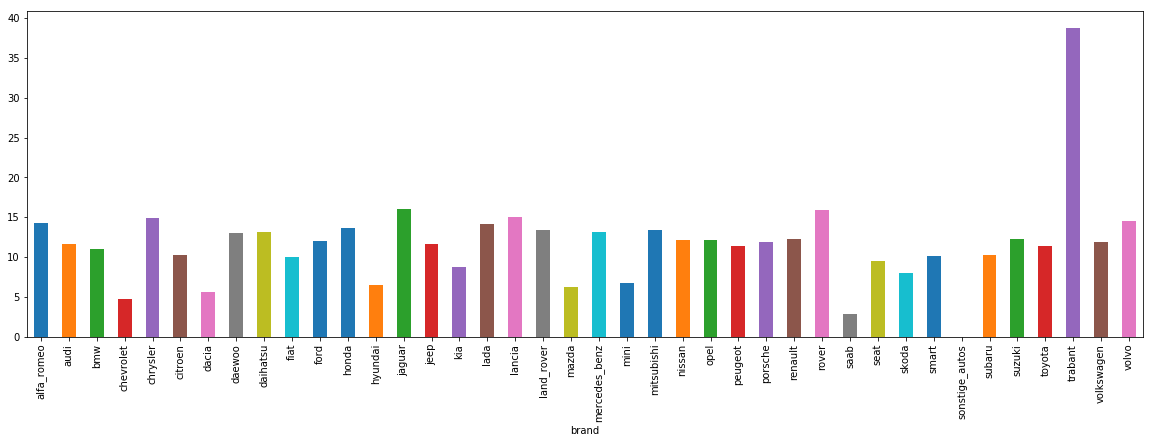

In [15]:
mod_frame.groupby('brand').car_age.mean().plot(kind = 'bar', ylim = 0, figsize = (20,6))

Вече забелязахме, че има невалидни данни в година на регистрация, нека ги видим

In [16]:
print((mod_frame.loc[mod_frame['car_age'] < 0]).count())
print((mod_frame.loc[mod_frame['car_age'] >50]).count())

name                   14680
seller                 14680
price                  14680
vehicleType            14680
gearbox                14680
powerPS                14680
kilometer              14680
monthOfRegistration    14680
fuelType               14680
brand                  14680
notRepairedDamage      14680
postalCode             14680
car_age                14680
dtype: int64
name                   1136
seller                 1136
price                  1136
vehicleType            1136
gearbox                1136
powerPS                1136
kilometer              1136
monthOfRegistration    1136
fuelType               1136
brand                  1136
notRepairedDamage      1136
postalCode             1136
car_age                1136
dtype: int64


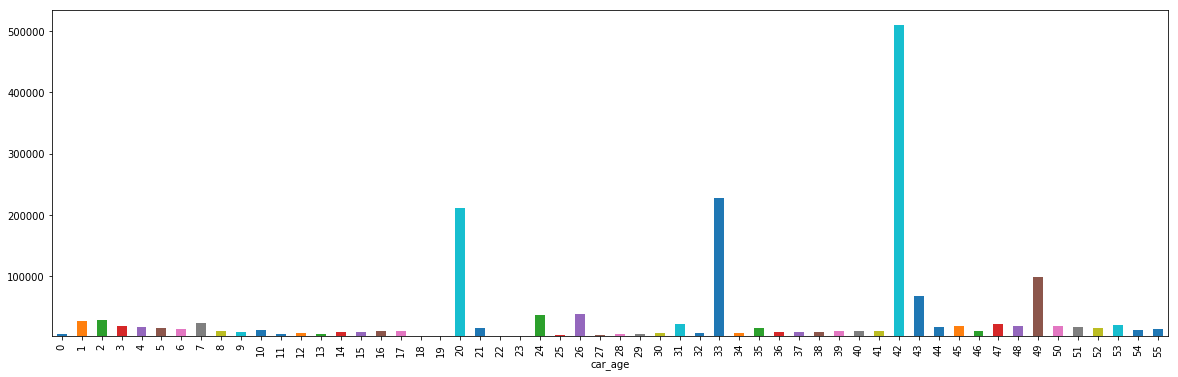

In [17]:
mod_frame = mod_frame.drop((mod_frame[(mod_frame.car_age < 0) | (mod_frame.car_age > 55)].index))
mod_frame.groupby('car_age').price.mean().plot(kind = 'bar', ylim = 1950, figsize = (20,6))

Добре тука виждаме леко несъответствие, явно някои хора са се шегували и са дали нереално висока цена на автомобилите си

In [18]:
mod_frame = mod_frame.drop((mod_frame[(mod_frame.price > 2000000)].index))

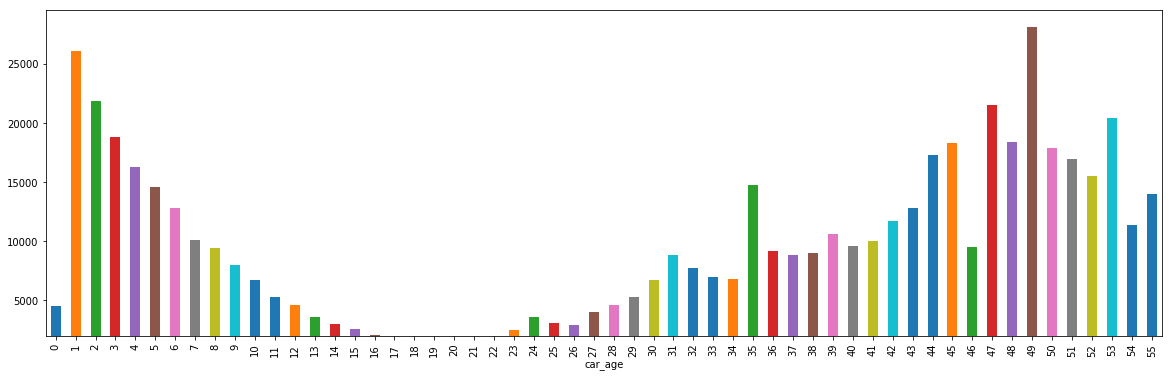

In [19]:
mod_frame.groupby('car_age').price.mean().plot(kind = 'bar', ylim = 1950, figsize = (20,6))

Сега нещата изглеждат доста по-добре, виждаме че антиките и новите коли са скъпиа тези в range [16-23], са най-скъпи

Нека да видим дали можем да открием нещо интересно и при другите feature-и

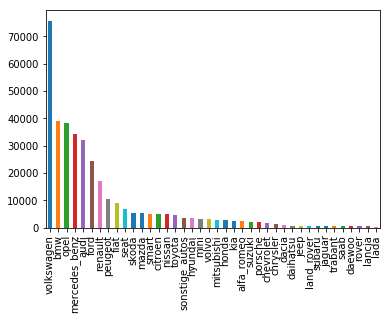

In [20]:
mod_frame['brand'].value_counts().plot(kind='bar')



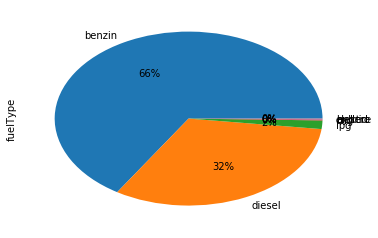

In [21]:
mod_frame['fuelType'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

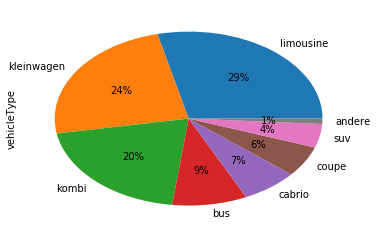

In [22]:
mod_frame['vehicleType'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D611629DA0>]], dtype=object)

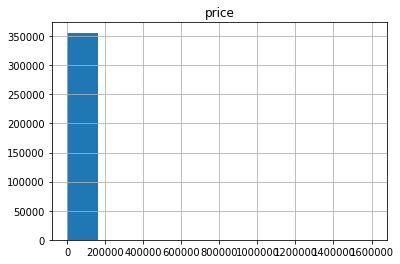

In [23]:
pd.DataFrame(mod_frame['price']).hist()

Докато си гледам данните в началото забелязвам, че има некоректно поставени цени, затова е по-добре да ги изрежа от dataset-а, за да не объркат регресионния модел.

In [24]:
mod_frame = mod_frame.drop((mod_frame[(mod_frame.price > 180000)].index))
mod_frame = mod_frame.drop((mod_frame[(mod_frame.price < 200)].index))

Забелязваме също, че цената не е нормално разпределена.Ако тренираме регресия, ще даде доста слаба точност (0.0002 ми даде без нормализирана цена :))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6115FA5C0>]], dtype=object)

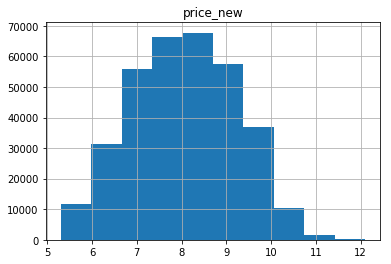

In [25]:
mod_frame["price_new"] = np.log1p(mod_frame["price"])
pd.DataFrame(mod_frame['price_new']).hist()


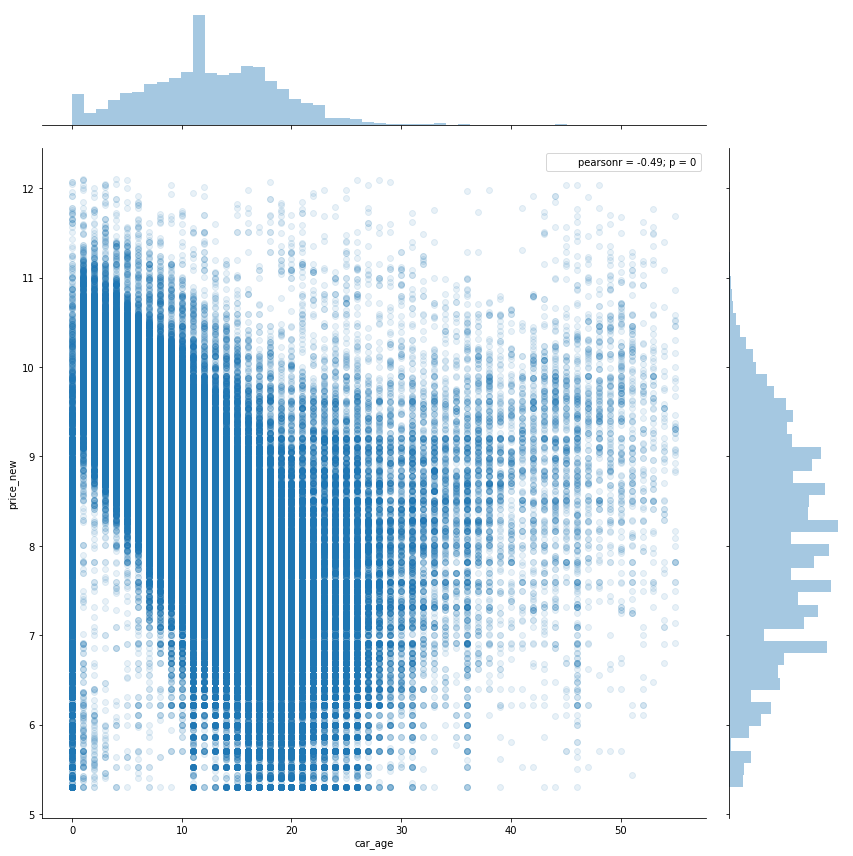

In [26]:
sns.jointplot(x = 'car_age', y = 'price_new', data = mod_frame[['car_age', 'price_new']], alpha=0.1, size=12 )

Представихме горната графика по друг начин. Сега се вижда сгъстяването, в кои зони се образува както и тука може да преценим броя на автомобилите. За разлика от горната графика, можехме да съдим че по-новите коли са на същата цена като най-старите, обаче на тази графика виждаме, че старите автомобили са много по-малко  

In [27]:
mod_frame = mod_frame.drop(['price'], axis=1)

Друго нещо, което може да направим, е да добавим като нов feature от колко думи е съставено името. Знаем, че хората обичат да изброяват екстрите на колата си още в самото наименование на обявата. Тези обяви по принцип имат по-висока обявена стойност.

In [28]:
import re
mod_frame['nameTokensLength'] = mod_frame.name.apply(lambda x: len(x.split('_')))
mod_frame = mod_frame.drop('name', axis=1)

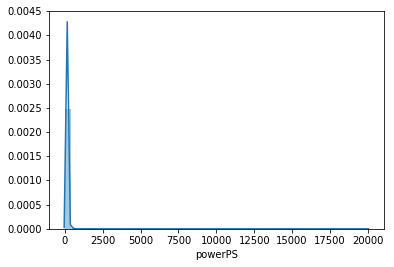

In [29]:
sns.distplot(mod_frame['powerPS'])

Както при цената,така и при конските сили забелязваме некоректно попълнени данни, затова нека и тук ги изрежем

In [30]:
mod_frame = mod_frame.drop((mod_frame[(mod_frame.powerPS < 50)].index))
mod_frame = mod_frame.drop((mod_frame[(mod_frame.powerPS > 500)].index))

In [31]:
#sns.distplot(mod_frame['car_age'])
from sklearn.preprocessing import scale

mod_frame[['powerPS']]= scale(mod_frame[['powerPS']])

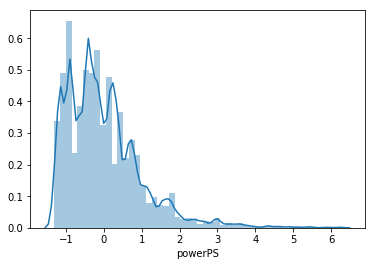

In [32]:
sns.distplot(mod_frame['powerPS'])

Изглежда ще тренираме, регресор. Първо ще пробваме с линейна регресия. За тази цел обаче първо трябва да си енкоднем данните. Ще използваме LabelEndoder за да ги представим в число и после ще използваме OneHotEncoder, да ги добавим като feature-и

In [33]:
categorical_columns = mod_frame.dtypes[mod_frame.dtypes == 'object'].index
print(categorical_columns)

Index(['seller', 'vehicleType', 'gearbox', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')


Нека си LabelEncode-нем данните

In [34]:
from sklearn.preprocessing import LabelEncoder
encoders = {col: LabelEncoder().fit(mod_frame[col]) for col in categorical_columns}

def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

numberic_column_names = mod_frame.drop('price_new', axis=1).describe().columns
label_categorial = encode_categorical(mod_frame, categorical_columns, encoders)

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

y_column = mod_frame['price_new']
mod_frame = mod_frame.drop('price_new', axis=1)
one_hot_categorial = OneHotEncoder().fit(label_categorial)
one_hot_categorial_frame = one_hot_categorial.transform(encode_categorical(mod_frame[categorical_columns], categorical_columns, encoders))
tr_fraim = pd.np.concatenate([mod_frame[numberic_column_names], one_hot_categorial_frame.todense()], axis=1)

X_train, X_test, y_train, y_test = train_test_split(tr_fraim, y_column, test_size=0.3, random_state=0)

Ииии...нека ги сплитнем

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tr_fraim, y_column, test_size=0.3, random_state=0)

Ще си потренираме линейна регресия

In [37]:
for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

(212342, 67)
(91005, 67)
(212342,)
(91005,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.696560539948
0.699019551454


Имаме резултат от около 70 %

Нека видим резултатите:

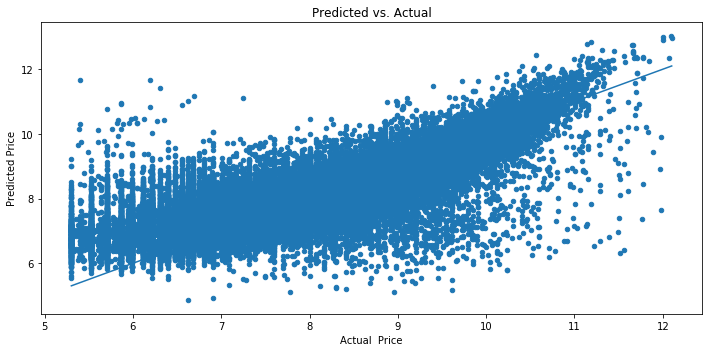

In [39]:
y_pred= regressor.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

Нека сега пробваме с RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 10, min_samples_leaf= 3,min_samples_split= 3, n_estimators= 5,random_state= 0)
        
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test, y_test))

0.830850539048
0.82261558225


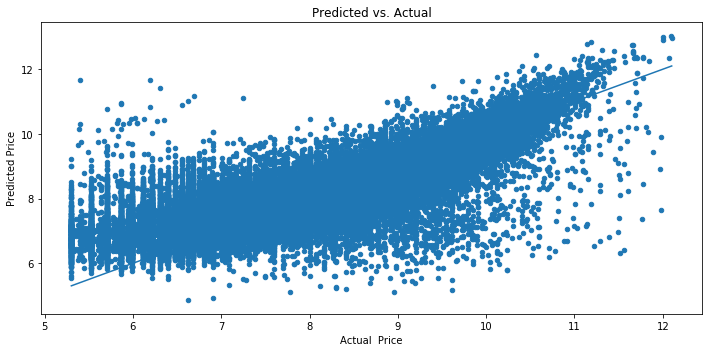

In [41]:
y_pred= regressor.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual  Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

С RandomForestRegressor изкарваме по-добър резултат, като Overfit-ваме. С GreedSearch може да намерим нужните параметри да подобрим този резултат